In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Reading the data --> Enter the path of the desired data in quotes
data = pd.read_csv('dummy.csv')

In [3]:
data

,CIF_NO,CODE_GENDER,NAME_EDUCATION_TYPE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,CNT_CHILDREN,OCCUPATION_TYPE,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CREDIT_LIMIT
0,73122693,M,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,202500.0,-637,0
1,73152323,F,Higher education,N,House / apartment,School,0,Core staff,270000.0,-1188,20000000
2,73171319,M,Secondary / secondary special,Y,House / apartment,Government,0,Laborers,67500.0,-225,4000000
3,73266627,F,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,135000.0,-3039,60000000
4,73266639,M,Secondary / secondary special,Y,House / apartment,Religion,0,Core staff,121500.0,-3038,5000000
...,...,...,...,...,...,...,...,...,...,...,...
8558,74932789,F,Secondary / secondary special,Y,House / apartment,Self-employed,1,NaN,63000.0,-2791,2000000
8559,74888041,M,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Drivers,225000.0,-7059,0
8560,73546253,F,Secondary / secondary special,N,House / apartment,Business Entity Type 3,0,NaN,247500.0,-1364,4000000
8561,74252323,F,Secondary / secondary special,Y,House / apartment,Self-employed,1,NaN,63000.0,-2791,0


Preprocessing the data to remove null values

In [4]:
import seaborn as sns

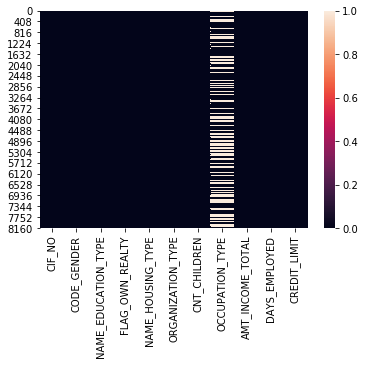

In [5]:
#Checking the plot for any null values in the dataframe
sns.heatmap(data.isnull())

As we see here, all the null values here are in 'OCCUPATION TYPE' column of the data

In [6]:
data.fillna('None',inplace=True)

We need to put categories instead of the categories of each column

In [7]:
data.head()

,CIF_NO,CODE_GENDER,NAME_EDUCATION_TYPE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,CNT_CHILDREN,OCCUPATION_TYPE,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CREDIT_LIMIT
0,73122693,M,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,202500.0,-637,0
1,73152323,F,Higher education,N,House / apartment,School,0,Core staff,270000.0,-1188,20000000
2,73171319,M,Secondary / secondary special,Y,House / apartment,Government,0,Laborers,67500.0,-225,4000000
3,73266627,F,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,135000.0,-3039,60000000
4,73266639,M,Secondary / secondary special,Y,House / apartment,Religion,0,Core staff,121500.0,-3038,5000000


As you can see, there is a credit limit assigned here which makes this data applicable to regression problems. 

In [8]:
#One-hot encoding the data

In [9]:
data_encoded = pd.get_dummies(data)

In [10]:
data_encoded.columns

Index(['CIF_NO', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'CREDIT_LIMIT', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Agriculture',
       'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Business Entity Type 1',
       'ORGANIZATION_TYPE_Business Entity Type 2',
       'ORGANIZATION_TYPE_Business Entity Type 3',
       'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Constru

In [11]:
#importing the necessary libraries for train test splits
from sklearn.model_selection import train_test_split

For this to work, we first need to take X and y properly where:

    X -> features (in this case, data.loc[:,'CIF_NO':'DAYS_EMPLOYED']
    y -> target variable (in this case , data[:,'CREDIT_LIMIT'])

In [12]:
X = data_encoded.loc[:, data_encoded.columns != 'CREDIT_LIMIT']

In [13]:
y = data_encoded.loc[:,'CREDIT_LIMIT']

In [14]:
X

,CIF_NO,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,73122693,0,202500.0,-637,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73152323,0,270000.0,-1188,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73171319,0,67500.0,-225,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73266627,0,135000.0,-3039,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73266639,0,121500.0,-3038,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,74932789,1,63000.0,-2791,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8559,74888041,0,225000.0,-7059,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8560,73546253,0,247500.0,-1364,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8561,74252323,1,63000.0,-2791,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
y

0              0
1       20000000
2        4000000
3       60000000
4        5000000
          ...   
8558     2000000
8559           0
8560     4000000
8561           0
8562    20000000
Name: CREDIT_LIMIT, Length: 8563, dtype: int64

In [16]:
#Splitting into train and test : Here you can define your own random state and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of Y_train is {}'.format(y_train.shape))
print('Shape of Y_test is {}'.format(y_test.shape))

Shape of X_train is (5994, 96)
Shape of X_test is (2569, 96)
Shape of Y_train is (5994,)
Shape of Y_test is (2569,)


Our models will be trained using (X_train,y_train) and will be tested using X_test in the first fit and using X_train in the second fit 

In [18]:
df_scores = pd.DataFrame()
model_name = []
r2_test = []
r2_train = []
rmse_test = []
rmse_train = []

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [20]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [21]:
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [22]:
model_name.append('Linear Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
clf = SGDRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [25]:
clf = SGDRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [26]:
model_name.append('Stochastic Gradient Descent Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [27]:
from sklearn.ensemble import VotingRegressor

In [28]:
clf = SGDRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [29]:
clf = SGDRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [30]:
model_name.append('Voting Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [31]:

from lightgbm.sklearn import LGBMRegressor

In [32]:
data_encoded.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in data_encoded.columns]
X = data_encoded.loc[:, data_encoded.columns != 'CREDIT_LIMIT']
y = data_encoded.loc[:, 'CREDIT_LIMIT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
clf = LGBMRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [34]:
clf = LGBMRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [35]:
model_name.append('LGBM Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
model_name.append('Logistic Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
clf = MLPRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [42]:
clf = MLPRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [43]:
model_name.append('MLP Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [44]:
from xgboost import XGBRegressor

In [45]:
clf = XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [46]:
clf = XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [47]:
model_name.append('XGB Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
model_name.append('Random Forest Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [52]:
from sklearn.ensemble import BaggingRegressor

In [53]:
clf = BaggingRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [54]:
clf = BaggingRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [55]:
model_name.append('Bagging Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
clf = GradientBoostingRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [58]:
clf = GradientBoostingRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [59]:
model_name.append('Gradient Boosting Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [60]:
from sklearn.ensemble import ExtraTreesRegressor

In [61]:
clf = ExtraTreesRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
clf = ExtraTreesRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
model_name.append('Extra Trees Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
clf = AdaBoostRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [66]:
clf = AdaBoostRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [67]:
model_name.append('AdaBoost Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [70]:
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [71]:
model_name.append('Decision Tree Regression')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [72]:
from sklearn.svm import SVR

In [73]:
clf = SVR()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
clf = SVR()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [75]:
model_name.append('SVR')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [76]:
from sklearn import linear_model

In [95]:
clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))

In [96]:
clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
r2_score_train = r2_score(y_train,y_pred) 
rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))

In [79]:
model_name.append('Bayesian Ridge')
r2_test.append(r2_score_test)
rmse_test.append(rmse_score_test)
r2_train.append(r2_score_train)
rmse_train.append(rmse_score_train)

In [101]:
df_scores['model_name'] = model_name
df_scores['r2_test'] = r2_test
df_scores['r2_train'] = r2_train
df_scores['rmse_test'] = rmse_test
df_scores['rmse_train'] = rmse_train

In [102]:
df_scores

,model_name,r2_test,r2_train,rmse_test,rmse_train
0,Linear Regression,-2.101629e-02,1.472451e-02,2.569729e+07,2.546136e+07
1,Stochastic Gradient Descent Regression,-2.646055e+30,-4.077592e+30,4.136856e+22,5.179700e+22
2,Voting Regression,-4.864536e+33,-1.580600e+32,1.773747e+24,3.224881e+23
3,LGBM Regression,-4.664854e-02,2.617923e-01,2.601785e+07,2.203900e+07
4,Logistic Regression,-6.902296e-01,-6.780197e-01,3.306312e+07,3.322777e+07
5,MLP Regression,-1.489070e-03,-1.166872e-03,2.545037e+07,2.566587e+07
6,XGB Regression,-1.410214e-01,5.004546e-01,2.716551e+07,1.812968e+07
7,Random Forest Regression,-1.482405e-01,7.938085e-01,2.725131e+07,1.164764e+07
8,Bagging Regression,-1.419317e-01,7.880724e-01,2.717634e+07,1.180855e+07
9,Gradient Boosting Regression,-1.025043e-02,6.807951e-02,2.556145e+07,2.476236e+07
